In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

import jax
import jax.numpy as jnp

from rejectax import base_rejection_sampler, rejection_sampler

In [2]:
# independent linear densities in multiple dimensions
def target(x):
    return jnp.prod((x >= 0) * (x <= 1) * x / 0.5)

## 1D

/tmp/ipykernel_30622/248457673.py:4: DeprecationWarning: jax.numpy.trapz is deprecated. Use jax.scipy.integrate.trapezoid instead.
  jnp.trapz(p, x)


Array(1., dtype=float32)

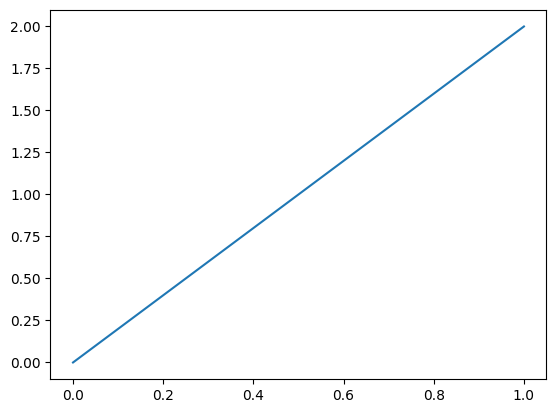

In [3]:
x = jnp.linspace(0, 1, 1_000)
p = jax.vmap(target)(x)
plt.plot(x, p);
jnp.trapz(p, x)

In [4]:
z = rejection_sampler(jax.random.PRNGKey(0), target, n = 1_000, max_ratio = 2.0)

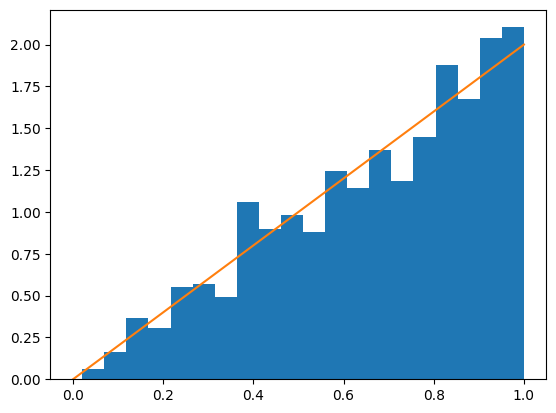

In [5]:
plt.hist(np.array(z), bins = 20, density = True);
plt.plot(x, p);

## 2D

/tmp/ipykernel_30622/853902150.py:7: DeprecationWarning: jax.numpy.trapz is deprecated. Use jax.scipy.integrate.trapezoid instead.
  jnp.trapz(jnp.trapz(p, x), y)


Array(1., dtype=float32)

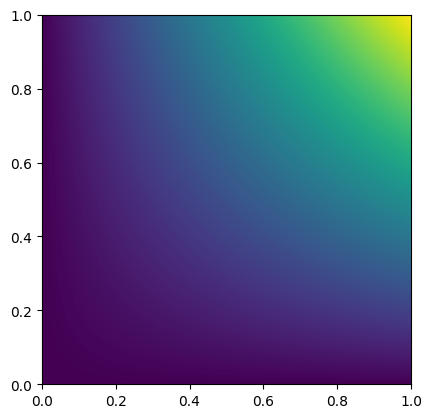

In [6]:
x = jnp.linspace(0, 1, 1_000)
y = jnp.linspace(0, 1, 1_000)
xgrid, ygrid = jnp.meshgrid(x, y)
xy = jnp.array([xgrid.ravel(), ygrid.ravel()]).T
p = jax.vmap(target)(xy).reshape(x.size, y.size)
plt.imshow(p, origin = 'lower', extent = [x.min(), x.max(), y.min(), y.max()])
jnp.trapz(jnp.trapz(p, x), y)

In [7]:
z = rejection_sampler(
    key = jax.random.PRNGKey(0),
    target = target,
    lo = (0.0, 0.0),
    hi = (1.0, 1.0),
    n = 10_000,
    max_ratio = 4.0,
)

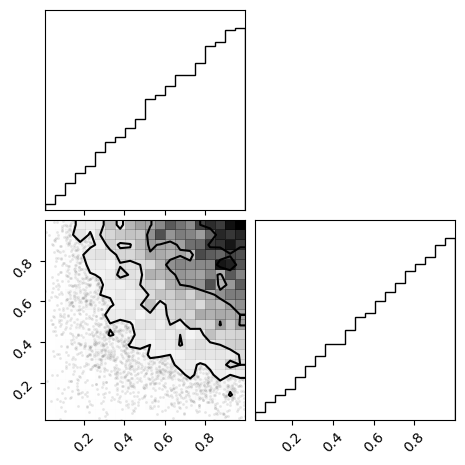

In [8]:
corner.corner(np.array(z));